Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# loading the dataset to a Pandas DataFrame
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import dataset
credit_card_data = pd.read_csv("/content/drive/MyDrive/credit_card_fraud-main/creditcard.csv")

In [4]:
# Import dataset
#credit_card_data = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
#credit_card_data = pd.read_csv('creditcard.csv')

In [5]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [ ]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [ ]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [ ]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
111271,72165.0,-1.432813,0.460023,1.550133,3.134704,-1.438940,1.121904,1.255067,0.570888,-1.733200,...,0.081129,-0.477661,0.745199,0.259522,0.206995,0.079468,-0.164602,0.044170,377.56,0
191642,129352.0,-0.022545,-0.590141,-0.206110,-3.082976,0.067134,-0.857531,-0.013659,-0.085178,-2.317796,...,0.261430,1.129958,0.051824,0.761396,-0.822162,-0.262559,0.460549,0.311263,25.00,0
7233,9544.0,1.283430,0.347681,0.237704,0.360896,-0.333382,-1.513922,0.327511,-0.460695,1.119772,...,-0.508498,-1.261361,0.198182,0.687754,0.143817,0.644481,-0.133901,-0.002511,10.50,0
242265,151416.0,-2.259233,2.178676,1.201323,0.675207,-0.375448,0.050797,0.517693,0.282087,1.577474,...,-0.816917,-1.569525,-0.117902,-0.240613,0.728473,-0.739023,1.092165,0.593683,19.35,0
97144,66088.0,1.336659,-0.666576,0.842251,-0.535656,-1.485941,-0.773900,-0.838789,-0.108096,-0.512758,...,-0.234242,-0.192822,0.033880,0.424777,0.118537,1.107344,-0.032560,0.019016,21.98,0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [ ]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96892.882114,0.029963,-0.116060,-0.127630,-0.097100,-0.082993,0.020474,0.015783,0.082795,0.015137,...,-0.046005,-0.007411,-0.004768,-0.024363,0.018974,-0.031744,-0.015024,-0.011159,-0.004407,90.087703
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into Features & Targets

In [ ]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
111271   72165.0 -1.432813  0.460023  1.550133  3.134704 -1.438940  1.121904   
191642  129352.0 -0.022545 -0.590141 -0.206110 -3.082976  0.067134 -0.857531   
7233      9544.0  1.283430  0.347681  0.237704  0.360896 -0.333382 -1.513922   
242265  151416.0 -2.259233  2.178676  1.201323  0.675207 -0.375448  0.050797   
97144    66088.0  1.336659 -0.666576  0.842251 -0.535656 -1.485941 -0.773900   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [ ]:
print(Y)

111271    0
191642    0
7233      0
242265    0
97144     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


## Machine Learning Algorithm

In [ ]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix

import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline
# It sets the backend of matplotlib to the 'inline' backend:
import time # calculate time

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad

from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer # create sparse matrix of words using regexptokenizes
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos

from PIL import Image # getting images in notebook
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud

from bs4 import BeautifulSoup # use for scraping the data from website
#from selenium import webdriver # use for automation chrome
#import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle# use to dump model

import warnings # ignores pink warnings
warnings.filterwarnings('ignore')

In [ ]:
df1 = new_dataset
pd.DataFrame(df1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
111271,72165.0,-1.432813,0.460023,1.550133,3.134704,-1.438940,1.121904,1.255067,0.570888,-1.733200,...,0.081129,-0.477661,0.745199,0.259522,0.206995,0.079468,-0.164602,0.044170,377.56,0
191642,129352.0,-0.022545,-0.590141,-0.206110,-3.082976,0.067134,-0.857531,-0.013659,-0.085178,-2.317796,...,0.261430,1.129958,0.051824,0.761396,-0.822162,-0.262559,0.460549,0.311263,25.00,0
7233,9544.0,1.283430,0.347681,0.237704,0.360896,-0.333382,-1.513922,0.327511,-0.460695,1.119772,...,-0.508498,-1.261361,0.198182,0.687754,0.143817,0.644481,-0.133901,-0.002511,10.50,0
242265,151416.0,-2.259233,2.178676,1.201323,0.675207,-0.375448,0.050797,0.517693,0.282087,1.577474,...,-0.816917,-1.569525,-0.117902,-0.240613,0.728473,-0.739023,1.092165,0.593683,19.35,0
97144,66088.0,1.336659,-0.666576,0.842251,-0.535656,-1.485941,-0.773900,-0.838789,-0.108096,-0.512758,...,-0.234242,-0.192822,0.033880,0.424777,0.118537,1.107344,-0.032560,0.019016,21.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


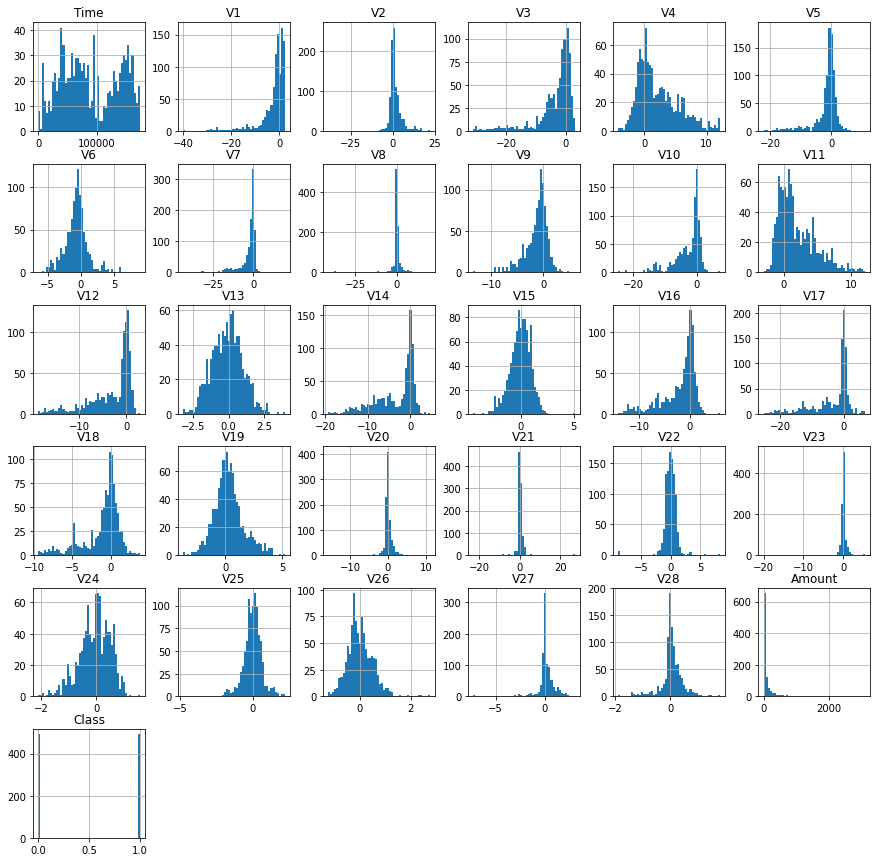

In [ ]:
df1.hist(bins = 50,figsize = (15,15))
plt.show()

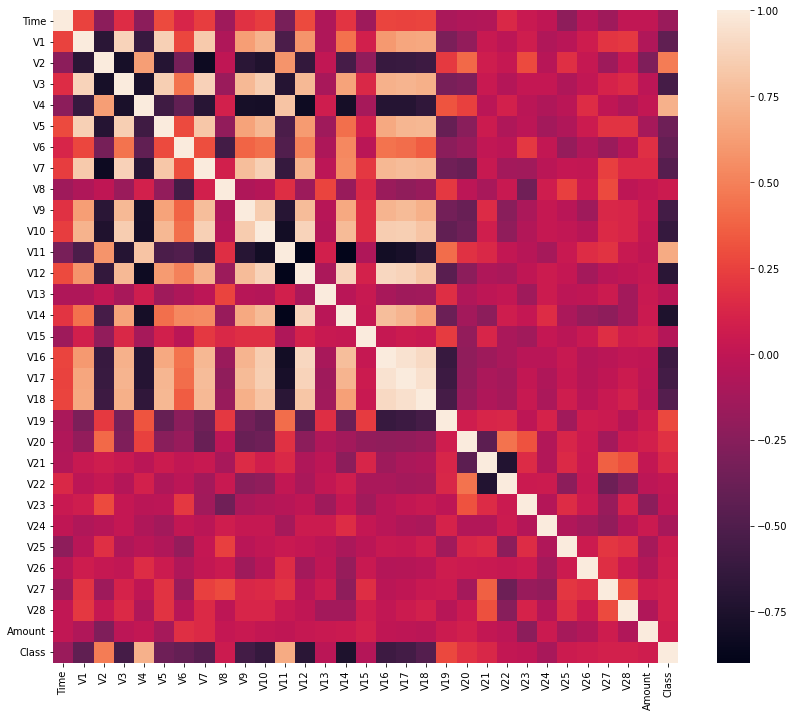

In [ ]:
plt.figure(figsize=(14,12))
sns.heatmap(df1.corr())
plt.show()

In [ ]:
#shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = df1
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,27187.0,-24.590245,14.044567,-26.278701,6.320089,-18.224513,-4.609968,-17.681003,16.213627,-3.794093,...,1.777063,-1.804874,-1.140605,0.152234,1.715997,-0.220471,1.434951,0.422492,99.99,1
1,18088.0,-12.224021,3.854150,-12.466766,9.648311,-2.726961,-4.445610,-21.922811,0.320792,-4.433162,...,-1.159830,-1.504119,-19.254328,0.544867,-4.781606,-0.007772,3.052358,-0.775036,1218.89,1
2,15084.0,1.096613,0.347179,1.796594,2.997066,-0.907562,0.007858,-0.653327,0.076092,1.409052,...,-0.215448,-0.242948,0.096623,0.645811,0.221268,-0.102136,0.014124,0.032973,4.95,0
3,35771.0,-3.218952,2.708535,-3.263042,1.361866,-1.645776,-1.852982,-3.069958,-1.796876,-0.213356,...,1.807877,-0.890421,-0.325814,0.123040,-0.093014,0.232106,-0.310519,-0.745295,60.60,1
4,47899.0,-0.489029,0.888760,0.669364,1.872415,2.106618,4.823636,-0.802084,0.377502,-0.845467,...,0.887065,0.193205,-0.128215,1.031091,-0.172583,0.351812,0.252964,0.150461,19.34,0


Split the data into Training data & Testing Data

In [ ]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2, stratify=Y, random_state = 2)
X_train.shape, X_test.shape

((787, 30), (197, 30))

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [ ]:
#importing packages
from sklearn.metrics import accuracy_score

In [ ]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
    ML_Model.append(model)
    acc_train.append(round(a, 3))
    acc_test.append(round(b, 3))

## Model Training

Decision Tree model

In [ ]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model
tree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
#predicting the target value from the model for the samples
Y_test_tree = tree.predict(X_test)
Y_train_tree = tree.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(Y_train,Y_train_tree)
acc_test_tree = accuracy_score(Y_test,Y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.978
Decision Tree: Accuracy on test Data: 0.904


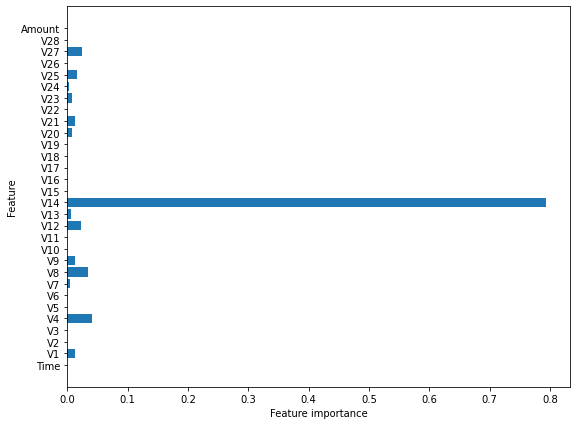

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

In [ ]:
Scores_ml = {}
Scores_ml['Decision Tree'] = np.round(tree.score(X_test,Y_test),2)

Training Accuracy : 0.9783989834815756
Testing Accuracy : 0.9035532994923858

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.93      0.88      0.91       104
        Good       0.88      0.92      0.90        93

    accuracy                           0.90       197
   macro avg       0.90      0.90      0.90       197
weighted avg       0.90      0.90      0.90       197


CONFUSION MATRIX


<Axes: >

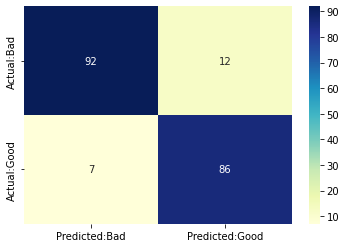

In [ ]:
print('Training Accuracy :',tree.score(X_train,Y_train))
print('Testing Accuracy :',tree.score(X_test,Y_test))
con_mat = pd.DataFrame(confusion_matrix(tree.predict(X_test), Y_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(tree.predict(X_test), Y_test,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

Random Forest model

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model
forest.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
#predicting the target value from the model for the samples
Y_test_forest = forest.predict(X_test)
Y_train_forest = forest.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(Y_train,Y_train_forest)
acc_test_forest = accuracy_score(Y_test,Y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.964
Random forest: Accuracy on test Data: 0.929


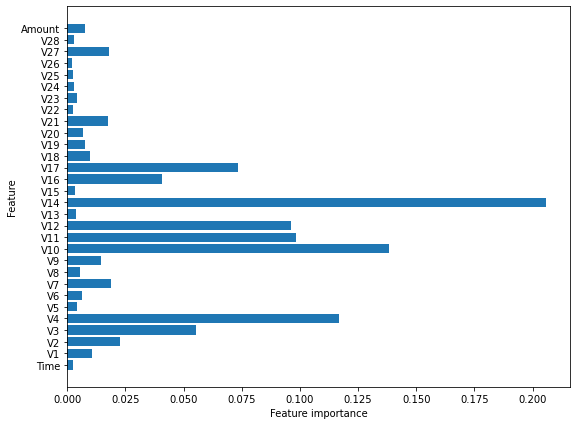

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

In [ ]:
Scores_ml = {}
Scores_ml['Random Forest'] = np.round(forest.score(X_test,Y_test),2)

Training Accuracy : 0.9644218551461246
Testing Accuracy : 0.9289340101522843

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.99      0.88      0.93       111
        Good       0.87      0.99      0.92        86

    accuracy                           0.93       197
   macro avg       0.93      0.94      0.93       197
weighted avg       0.94      0.93      0.93       197


CONFUSION MATRIX


<Axes: >

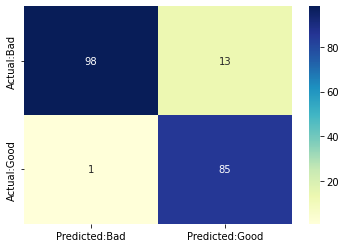

In [ ]:
print('Training Accuracy :',forest.score(X_train,Y_train))
print('Testing Accuracy :',forest.score(X_test,Y_test))
con_mat = pd.DataFrame(confusion_matrix(forest.predict(X_test), Y_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(forest.predict(X_test), Y_test,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

Support vector machine model

In [ ]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=2)
#fit the model
svm.fit(X_train, Y_train)

SVC(kernel='linear', random_state=2)

In [ ]:
#predicting the target value from the model for the samples
Y_test_svm = svm.predict(X_test)
Y_train_svm = svm.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(Y_train,Y_train_svm)
acc_test_svm = accuracy_score(Y_test,Y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.895
SVM : Accuracy on test Data: 0.904


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm)

In [ ]:
Scores_ml = {}
Scores_ml['SVM'] = np.round(svm.score(X_test,Y_test),2)

Training Accuracy : 0.8945362134688691
Testing Accuracy : 0.9035532994923858

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       1.00      0.84      0.91       118
        Good       0.81      1.00      0.89        79

    accuracy                           0.90       197
   macro avg       0.90      0.92      0.90       197
weighted avg       0.92      0.90      0.90       197


CONFUSION MATRIX


<Axes: >

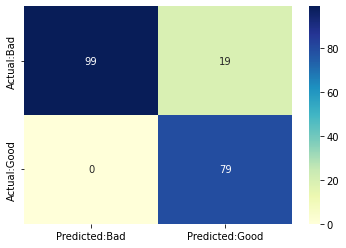

In [ ]:
print('Training Accuracy :',svm.score(X_train,Y_train))
print('Testing Accuracy :',svm.score(X_test,Y_test))
con_mat = pd.DataFrame(confusion_matrix(svm.predict(X_test), Y_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(svm.predict(X_test), Y_test,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

Logistic Regression


In [ ]:
# create lr object
lr = LogisticRegression()

In [ ]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
lr.score(X_test,Y_test)

0.9543147208121827

In [ ]:
#predicting the target value from the model for the samples
Y_test_lr = lr.predict(X_test)
Y_train_lr = lr.predict(X_train)

In [ ]:
#computing the accuracy of the model performance
acc_train_lr = accuracy_score(Y_train,Y_train_lr)
acc_test_lr = accuracy_score(Y_test,Y_test_lr)

print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_lr))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_lr))

Logistic Regression : Accuracy on training Data: 0.948
Logistic Regression : Accuracy on test Data: 0.954


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('lr', acc_train_lr, acc_test_lr)

In [ ]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(X_test,Y_test),2)

Training Accuracy : 0.9479034307496823
Testing Accuracy : 0.9543147208121827

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.98      0.93      0.96       104
        Good       0.93      0.98      0.95        93

    accuracy                           0.95       197
   macro avg       0.95      0.96      0.95       197
weighted avg       0.96      0.95      0.95       197


CONFUSION MATRIX


<Axes: >

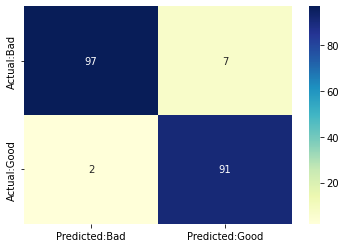

In [ ]:
print('Training Accuracy :',lr.score(X_train,Y_train))
print('Testing Accuracy :',lr.score(X_test,Y_test))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(X_test), Y_test),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(X_test), Y_test,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

## Results / Model Evaluation

Accuracy Score

In [ ]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.978,0.904
1,Random Forest,0.964,0.929
2,SVM,0.895,0.904
3,lr,0.948,0.954


In [ ]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
3,lr,0.948,0.954
1,Random Forest,0.964,0.929
0,Decision Tree,0.978,0.904
2,SVM,0.895,0.904


In [ ]:
# save Logistic Regression model to file
import pickle
pickle.dump(forest, open("lr.pkl", "wb"))

In [ ]:
# load model from file
loaded_model = pickle.load(open("lr.pkl", "rb"))

In [ ]:
result = loaded_model.score(X_train, Y_train)
print(result)

0.9644218551461246
